In [78]:
import psycopg2
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [114]:
conn = psycopg2.connect(
    dbname="sentirhy",
    user="owner",
    password="oaPBeAzranUQ",
    host="104.168.28.119"
)


In [115]:
cursor = conn.cursor()

query = "SELECT * FROM sentirhy.audiofeats"
cursor.execute(query)

records = cursor.fetchall()

df = pd.DataFrame(records, columns=[col[0] for col in cursor.description])

cursor.close()
conn.close()

In [116]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
df['combinedemotion'] = label_encoder.fit_transform(df['combinedemotion'])

In [117]:
classes = np.unique(df['combinedemotion'])
weights = compute_class_weight(class_weight='balanced', classes=classes, y=df['combinedemotion'])

# Create a dictionary mapping class labels to weights
class_weights = dict(zip(classes, weights))

In [118]:
class_weights

{0: 4.023809523809524, 1: 1.05625, 2: 0.3930232558139535, 3: 3.840909090909091}

In [119]:
df

,trackid,tempo,key,mode,loudness,valence,valenceemotion,featureemotion,clusteremotion,combinedemotion
0,2cxcqKwQtfKq7giphxjzOu,102.983,8,1,-4.665,0.630,Neutral,Happy,Happy,1
1,1hAloWiinXLPQUJxrJReb1,165.783,10,0,-2.692,0.876,Happy,Happy,Neutral,1
2,1rDgAHDX95RmylxjgVW9tN,132.054,10,0,-0.425,0.742,Happy,Happy,Neutral,1
3,5LkmpgQYtwHtuvASgnLBe1,109.976,7,1,-3.870,0.784,Happy,Happy,Happy,1
4,0GWNtMohuYUEHVZ40tcnHF,117.048,6,0,-4.431,0.722,Happy,Happy,Neutral,1
...,...,...,...,...,...,...,...,...,...,...
1009,31ZO9XuKt48Qb2eUTBynd2,126.996,0,0,-5.611,0.356,Neutral,Uncategorized,Happy,2
1010,2wlJT4GJkQNXeI4GxLUhLQ,104.983,7,1,-5.932,0.578,Neutral,Happy,Angry,2
1011,7fhiGdj0nn0ZCmIAocG8G0,144.783,4,1,-6.060,0.376,Neutral,Uncategorized,Sad,2
1012,7v0EsDFDBpCgmIruSQTUNZ,96.076,11,1,-3.186,0.876,Happy,Uncategorized,Angry,1


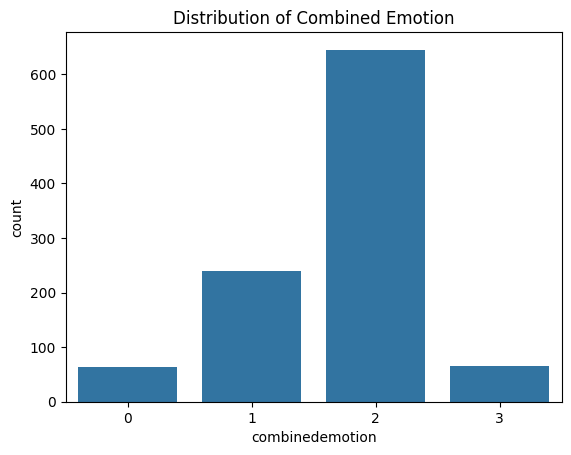

In [120]:
sns.countplot(x='combinedemotion', data=df)
plt.title('Distribution of Combined Emotion')
plt.show()

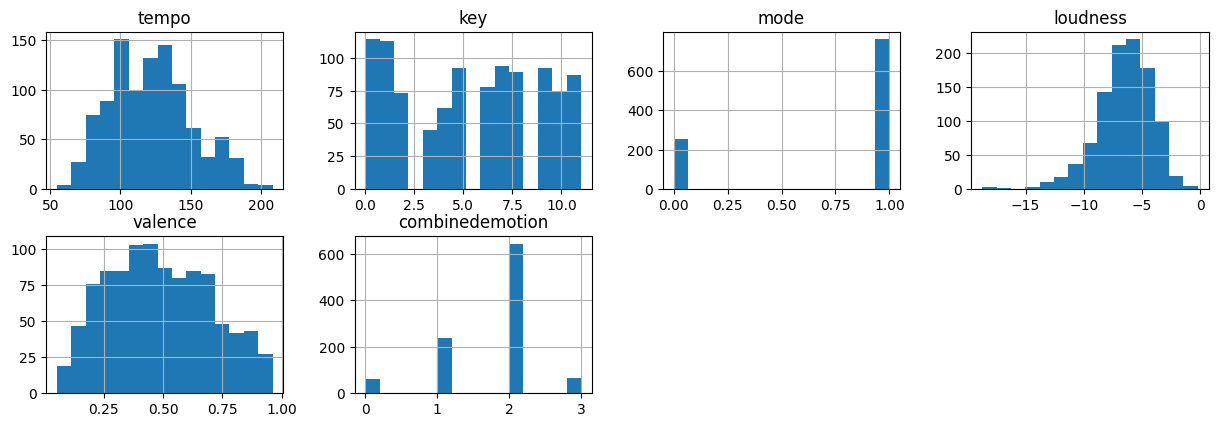

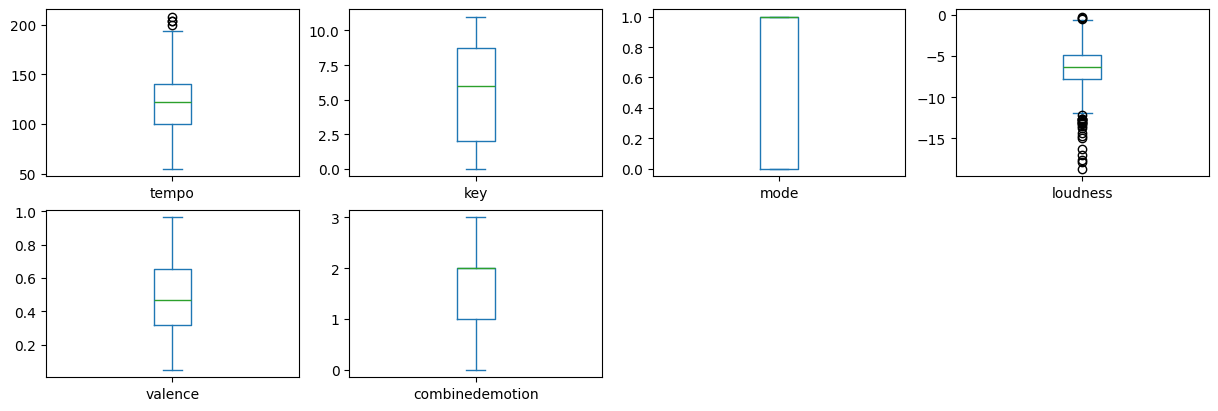

In [121]:
df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.show()

# Box plots for numerical features to identify outliers
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,10))
plt.show()

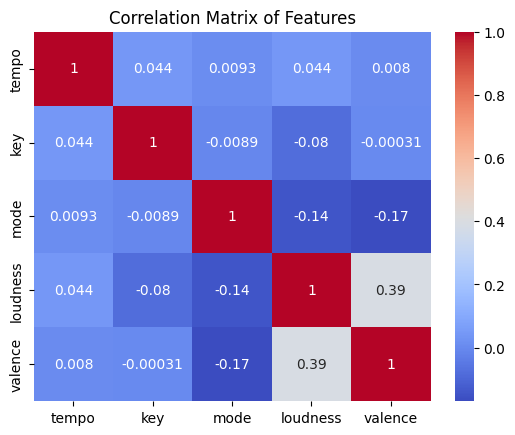

In [122]:
# Including only numerical features here
corr_matrix = df[['tempo', 'key', 'mode', 'loudness', 'valence']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()


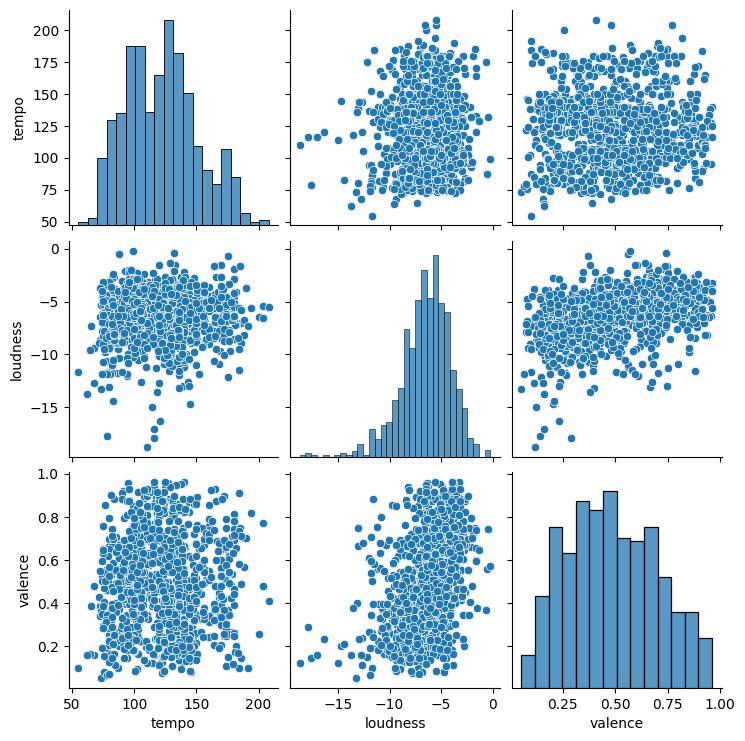

In [123]:
# Using seaborn's pairplot to visualize pairwise relationships between a subset of features
sns.pairplot(df[['tempo', 'loudness', 'valence']])
plt.show()


In [124]:
Q1 = df[['tempo', 'loudness']].quantile(0.25)
Q3 = df[['tempo', 'loudness']].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df[['tempo', 'loudness']] < lower_bound) | (df[['tempo', 'loudness']] > upper_bound)).any(axis=1)

# Remove outliers
df_no_outliers = df[~outliers]


In [125]:
df_no_outliers

,trackid,tempo,key,mode,loudness,valence,valenceemotion,featureemotion,clusteremotion,combinedemotion
0,2cxcqKwQtfKq7giphxjzOu,102.983,8,1,-4.665,0.630,Neutral,Happy,Happy,1
1,1hAloWiinXLPQUJxrJReb1,165.783,10,0,-2.692,0.876,Happy,Happy,Neutral,1
3,5LkmpgQYtwHtuvASgnLBe1,109.976,7,1,-3.870,0.784,Happy,Happy,Happy,1
4,0GWNtMohuYUEHVZ40tcnHF,117.048,6,0,-4.431,0.722,Happy,Happy,Neutral,1
5,7sditHCsoFw3nHnjFv1BHV,146.354,8,1,-5.310,0.275,Sad/Angry,Uncategorized,Angry,0
...,...,...,...,...,...,...,...,...,...,...
1009,31ZO9XuKt48Qb2eUTBynd2,126.996,0,0,-5.611,0.356,Neutral,Uncategorized,Happy,2
1010,2wlJT4GJkQNXeI4GxLUhLQ,104.983,7,1,-5.932,0.578,Neutral,Happy,Angry,2
1011,7fhiGdj0nn0ZCmIAocG8G0,144.783,4,1,-6.060,0.376,Neutral,Uncategorized,Sad,2
1012,7v0EsDFDBpCgmIruSQTUNZ,96.076,11,1,-3.186,0.876,Happy,Uncategorized,Angry,1


In [126]:
df_no_outliers = df_no_outliers.drop(['valenceemotion', 'featureemotion', 'clusteremotion'], axis=1)
df_no_outliers

,trackid,tempo,key,mode,loudness,valence,combinedemotion
0,2cxcqKwQtfKq7giphxjzOu,102.983,8,1,-4.665,0.630,1
1,1hAloWiinXLPQUJxrJReb1,165.783,10,0,-2.692,0.876,1
3,5LkmpgQYtwHtuvASgnLBe1,109.976,7,1,-3.870,0.784,1
4,0GWNtMohuYUEHVZ40tcnHF,117.048,6,0,-4.431,0.722,1
5,7sditHCsoFw3nHnjFv1BHV,146.354,8,1,-5.310,0.275,0
...,...,...,...,...,...,...,...
1009,31ZO9XuKt48Qb2eUTBynd2,126.996,0,0,-5.611,0.356,2
1010,2wlJT4GJkQNXeI4GxLUhLQ,104.983,7,1,-5.932,0.578,2
1011,7fhiGdj0nn0ZCmIAocG8G0,144.783,4,1,-6.060,0.376,2
1012,7v0EsDFDBpCgmIruSQTUNZ,96.076,11,1,-3.186,0.876,1


In [128]:
scaler = StandardScaler()
features_to_scale = ['tempo', 'loudness', 'valence']
df_no_outliers[features_to_scale] = scaler.fit_transform(df_no_outliers[features_to_scale])

In [129]:
df_no_outliers

,trackid,tempo,key,mode,loudness,valence,combinedemotion
0,2cxcqKwQtfKq7giphxjzOu,-0.671134,8,1,0.807834,0.657432,1
1,1hAloWiinXLPQUJxrJReb1,1.564298,10,0,1.749731,1.809798,1
3,5LkmpgQYtwHtuvASgnLBe1,-0.422210,7,1,1.187362,1.378832,1
4,0GWNtMohuYUEHVZ40tcnHF,-0.170475,6,0,0.919544,1.088399,1
5,7sditHCsoFw3nHnjFv1BHV,0.872702,8,1,0.499915,-1.005534,0
...,...,...,...,...,...,...,...
1009,31ZO9XuKt48Qb2eUTBynd2,0.183634,0,0,0.356219,-0.626097,2
1010,2wlJT4GJkQNXeI4GxLUhLQ,-0.599942,7,1,0.202976,0.413843,2
1011,7fhiGdj0nn0ZCmIAocG8G0,0.816781,4,1,0.141870,-0.532408,2
1012,7v0EsDFDBpCgmIruSQTUNZ,-0.916996,11,1,1.513899,1.809798,1


In [130]:
keys_encoded = pd.get_dummies(df_no_outliers['key'], prefix='key')
keys_encoded

,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False
5,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1009,True,False,False,False,False,False,False,False,False,False,False,False
1010,False,False,False,False,False,False,False,True,False,False,False,False
1011,False,False,False,False,True,False,False,False,False,False,False,False
1012,False,False,False,False,False,False,False,False,False,False,False,True


In [131]:
df_no_outliers = pd.concat([df_no_outliers, keys_encoded], axis=1)
df_no_outliers

,trackid,tempo,key,mode,loudness,valence,combinedemotion,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,2cxcqKwQtfKq7giphxjzOu,-0.671134,8,1,0.807834,0.657432,1,False,False,False,False,False,False,False,False,True,False,False,False
1,1hAloWiinXLPQUJxrJReb1,1.564298,10,0,1.749731,1.809798,1,False,False,False,False,False,False,False,False,False,False,True,False
3,5LkmpgQYtwHtuvASgnLBe1,-0.422210,7,1,1.187362,1.378832,1,False,False,False,False,False,False,False,True,False,False,False,False
4,0GWNtMohuYUEHVZ40tcnHF,-0.170475,6,0,0.919544,1.088399,1,False,False,False,False,False,False,True,False,False,False,False,False
5,7sditHCsoFw3nHnjFv1BHV,0.872702,8,1,0.499915,-1.005534,0,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,31ZO9XuKt48Qb2eUTBynd2,0.183634,0,0,0.356219,-0.626097,2,True,False,False,False,False,False,False,False,False,False,False,False
1010,2wlJT4GJkQNXeI4GxLUhLQ,-0.599942,7,1,0.202976,0.413843,2,False,False,False,False,False,False,False,True,False,False,False,False
1011,7fhiGdj0nn0ZCmIAocG8G0,0.816781,4,1,0.141870,-0.532408,2,False,False,False,False,True,False,False,False,False,False,False,False
1012,7v0EsDFDBpCgmIruSQTUNZ,-0.916996,11,1,1.513899,1.809798,1,False,False,False,False,False,False,False,False,False,False,False,True


In [132]:
for column in keys_encoded.columns:
    df_no_outliers[f"{column}_mode_interaction"] = df_no_outliers[column] * df_no_outliers['mode']

In [133]:
df

,trackid,tempo,key,mode,loudness,valence,valenceemotion,featureemotion,clusteremotion,combinedemotion
0,2cxcqKwQtfKq7giphxjzOu,102.983,8,1,-4.665,0.630,Neutral,Happy,Happy,1
1,1hAloWiinXLPQUJxrJReb1,165.783,10,0,-2.692,0.876,Happy,Happy,Neutral,1
2,1rDgAHDX95RmylxjgVW9tN,132.054,10,0,-0.425,0.742,Happy,Happy,Neutral,1
3,5LkmpgQYtwHtuvASgnLBe1,109.976,7,1,-3.870,0.784,Happy,Happy,Happy,1
4,0GWNtMohuYUEHVZ40tcnHF,117.048,6,0,-4.431,0.722,Happy,Happy,Neutral,1
...,...,...,...,...,...,...,...,...,...,...
1009,31ZO9XuKt48Qb2eUTBynd2,126.996,0,0,-5.611,0.356,Neutral,Uncategorized,Happy,2
1010,2wlJT4GJkQNXeI4GxLUhLQ,104.983,7,1,-5.932,0.578,Neutral,Happy,Angry,2
1011,7fhiGdj0nn0ZCmIAocG8G0,144.783,4,1,-6.060,0.376,Neutral,Uncategorized,Sad,2
1012,7v0EsDFDBpCgmIruSQTUNZ,96.076,11,1,-3.186,0.876,Happy,Uncategorized,Angry,1


In [134]:
df_no_outliers = df_no_outliers.drop(['trackid'], axis=1)

In [135]:
df_no_outliers['tempo_loudness'] = df_no_outliers['tempo'] * df_no_outliers['loudness']
df_no_outliers

,tempo,key,mode,loudness,valence,combinedemotion,key_0,key_1,key_2,key_3,...,key_3_mode_interaction,key_4_mode_interaction,key_5_mode_interaction,key_6_mode_interaction,key_7_mode_interaction,key_8_mode_interaction,key_9_mode_interaction,key_10_mode_interaction,key_11_mode_interaction,tempo_loudness
0,-0.671134,8,1,0.807834,0.657432,1,False,False,False,False,...,0,0,0,0,0,1,0,0,0,-0.542164
1,1.564298,10,0,1.749731,1.809798,1,False,False,False,False,...,0,0,0,0,0,0,0,0,0,2.737101
3,-0.422210,7,1,1.187362,1.378832,1,False,False,False,False,...,0,0,0,0,1,0,0,0,0,-0.501317
4,-0.170475,6,0,0.919544,1.088399,1,False,False,False,False,...,0,0,0,0,0,0,0,0,0,-0.156759
5,0.872702,8,1,0.499915,-1.005534,0,False,False,False,False,...,0,0,0,0,0,1,0,0,0,0.436277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0.183634,0,0,0.356219,-0.626097,2,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0.065414
1010,-0.599942,7,1,0.202976,0.413843,2,False,False,False,False,...,0,0,0,0,1,0,0,0,0,-0.121774
1011,0.816781,4,1,0.141870,-0.532408,2,False,False,False,False,...,0,1,0,0,0,0,0,0,0,0.115876
1012,-0.916996,11,1,1.513899,1.809798,1,False,False,False,False,...,0,0,0,0,0,0,0,0,1,-1.388238


In [136]:
from sklearn.preprocessing import PolynomialFeatures

X = df_no_outliers[['tempo', 'loudness', 'key_0_mode_interaction', 'key_1_mode_interaction',
       'key_2_mode_interaction', 'key_3_mode_interaction',
       'key_4_mode_interaction', 'key_5_mode_interaction',
       'key_6_mode_interaction', 'key_7_mode_interaction',
       'key_8_mode_interaction', 'key_9_mode_interaction',
       'key_10_mode_interaction', 'key_11_mode_interaction',]]
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(['tempo', 'loudness', 'key_0_mode_interaction', 'key_1_mode_interaction',
       'key_2_mode_interaction', 'key_3_mode_interaction',
       'key_4_mode_interaction', 'key_5_mode_interaction',
       'key_6_mode_interaction', 'key_7_mode_interaction',
       'key_8_mode_interaction', 'key_9_mode_interaction',
       'key_10_mode_interaction', 'key_11_mode_interaction',]))
df_poly = pd.concat([df_no_outliers.reset_index(drop=True), poly_df], axis=1)

In [137]:
df_no_outliers.columns

Index(['tempo', 'key', 'mode', 'loudness', 'valence', 'combinedemotion',
       'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7',
       'key_8', 'key_9', 'key_10', 'key_11', 'key_0_mode_interaction',
       'key_1_mode_interaction', 'key_2_mode_interaction',
       'key_3_mode_interaction', 'key_4_mode_interaction',
       'key_5_mode_interaction', 'key_6_mode_interaction',
       'key_7_mode_interaction', 'key_8_mode_interaction',
       'key_9_mode_interaction', 'key_10_mode_interaction',
       'key_11_mode_interaction', 'tempo_loudness'],
      dtype='object')

In [138]:
df_poly

,tempo,key,mode,loudness,valence,combinedemotion,key_0,key_1,key_2,key_3,...,key_8_mode_interaction^2,key_8_mode_interaction key_9_mode_interaction,key_8_mode_interaction key_10_mode_interaction,key_8_mode_interaction key_11_mode_interaction,key_9_mode_interaction^2,key_9_mode_interaction key_10_mode_interaction,key_9_mode_interaction key_11_mode_interaction,key_10_mode_interaction^2,key_10_mode_interaction key_11_mode_interaction,key_11_mode_interaction^2
0,-0.671134,8,1,0.807834,0.657432,1,False,False,False,False,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.564298,10,0,1.749731,1.809798,1,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.422210,7,1,1.187362,1.378832,1,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.170475,6,0,0.919544,1.088399,1,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.872702,8,1,0.499915,-1.005534,0,False,False,False,False,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,0.183634,0,0,0.356219,-0.626097,2,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
983,-0.599942,7,1,0.202976,0.413843,2,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
984,0.816781,4,1,0.141870,-0.532408,2,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
985,-0.916996,11,1,1.513899,1.809798,1,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


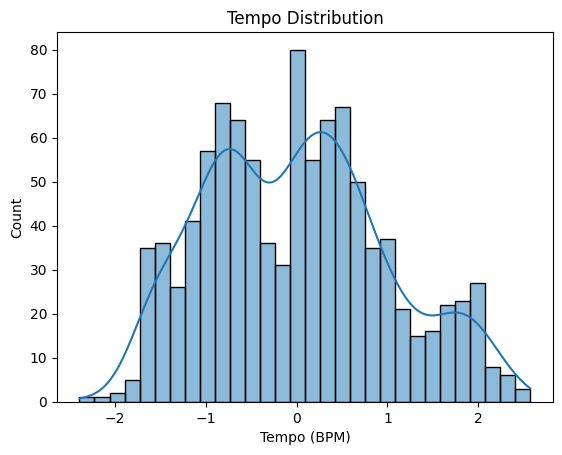

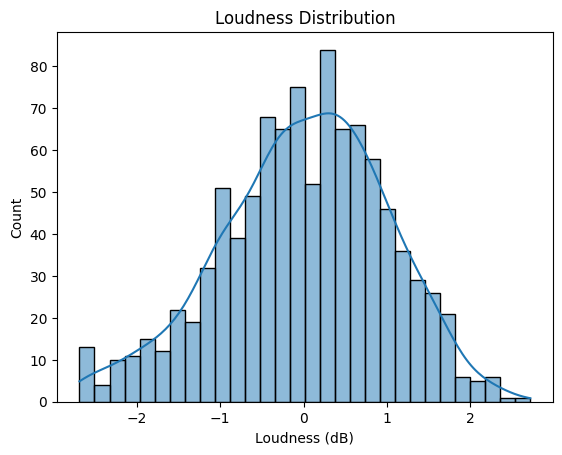

In [139]:
sns.histplot(df_no_outliers['tempo'], bins=30, kde=True)
plt.title('Tempo Distribution')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Count')
plt.show()

sns.histplot(df_no_outliers['loudness'], bins=30, kde=True)
plt.title('Loudness Distribution')
plt.xlabel('Loudness (dB)')
plt.ylabel('Count')
plt.show()

In [140]:
# Calculate quantiles for tempo
tempo_quantiles = df_no_outliers['tempo'].quantile([0.25, 0.5, 0.75])

# Use the quantiles to define bins
tempo_bins = [-np.inf, tempo_quantiles[0.25], tempo_quantiles[0.5], tempo_quantiles[0.75], np.inf]
df_no_outliers['tempo_quantile_bins'] = pd.cut(df_no_outliers['tempo'], bins=tempo_bins, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Calculate quantiles for loudness
loudness_quantiles = df_no_outliers['loudness'].quantile([0.25, 0.5, 0.75])

# Use the quantiles to define bins
loudness_bins = [-np.inf, loudness_quantiles[0.25], loudness_quantiles[0.5], loudness_quantiles[0.75], np.inf]
df_no_outliers['loudness_quantile_bins'] = pd.cut(df_no_outliers['loudness'], bins=loudness_bins, labels=['Q1', 'Q2', 'Q3', 'Q4'])


In [141]:
df_no_outliers

,tempo,key,mode,loudness,valence,combinedemotion,key_0,key_1,key_2,key_3,...,key_5_mode_interaction,key_6_mode_interaction,key_7_mode_interaction,key_8_mode_interaction,key_9_mode_interaction,key_10_mode_interaction,key_11_mode_interaction,tempo_loudness,tempo_quantile_bins,loudness_quantile_bins
0,-0.671134,8,1,0.807834,0.657432,1,False,False,False,False,...,0,0,0,1,0,0,0,-0.542164,Q2,Q4
1,1.564298,10,0,1.749731,1.809798,1,False,False,False,False,...,0,0,0,0,0,0,0,2.737101,Q4,Q4
3,-0.422210,7,1,1.187362,1.378832,1,False,False,False,False,...,0,0,1,0,0,0,0,-0.501317,Q2,Q4
4,-0.170475,6,0,0.919544,1.088399,1,False,False,False,False,...,0,0,0,0,0,0,0,-0.156759,Q2,Q4
5,0.872702,8,1,0.499915,-1.005534,0,False,False,False,False,...,0,0,0,1,0,0,0,0.436277,Q4,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0.183634,0,0,0.356219,-0.626097,2,True,False,False,False,...,0,0,0,0,0,0,0,0.065414,Q3,Q3
1010,-0.599942,7,1,0.202976,0.413843,2,False,False,False,False,...,0,0,1,0,0,0,0,-0.121774,Q2,Q3
1011,0.816781,4,1,0.141870,-0.532408,2,False,False,False,False,...,0,0,0,0,0,0,0,0.115876,Q4,Q3
1012,-0.916996,11,1,1.513899,1.809798,1,False,False,False,False,...,0,0,0,0,0,0,1,-1.388238,Q1,Q4


In [142]:
df_no_outliers = pd.get_dummies(df_no_outliers, columns=['tempo_quantile_bins', 'loudness_quantile_bins'])

In [159]:
print(df_no_outliers.drop('combinedemotion', axis=1).columns)

Index(['tempo', 'key', 'mode', 'loudness', 'valence', 'key_0', 'key_1',
       'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9',
       'key_10', 'key_11', 'key_0_mode_interaction', 'key_1_mode_interaction',
       'key_2_mode_interaction', 'key_3_mode_interaction',
       'key_4_mode_interaction', 'key_5_mode_interaction',
       'key_6_mode_interaction', 'key_7_mode_interaction',
       'key_8_mode_interaction', 'key_9_mode_interaction',
       'key_10_mode_interaction', 'key_11_mode_interaction', 'tempo_loudness',
       'tempo_quantile_bins_Q1', 'tempo_quantile_bins_Q2',
       'tempo_quantile_bins_Q3', 'tempo_quantile_bins_Q4',
       'loudness_quantile_bins_Q1', 'loudness_quantile_bins_Q2',
       'loudness_quantile_bins_Q3', 'loudness_quantile_bins_Q4'],
      dtype='object')


In [144]:
from sklearn.model_selection import train_test_split

# Assume 'df' is your feature set and 'target' is your target variable.
X_train, X_test, y_train, y_test = train_test_split(df_no_outliers.drop('combinedemotion', axis=1), df_no_outliers['combinedemotion'], test_size=0.2, random_state=42)


In [145]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [146]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)

# View mean cross-validation score
print(f'Average CV Score: {scores.mean()}')


Average CV Score: 0.8225993711198903


In [147]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.60      0.25      0.35        12
           1       0.95      0.72      0.82        57
           2       0.79      0.97      0.87       121
           3       1.00      0.25      0.40         8

    accuracy                           0.82       198
   macro avg       0.84      0.55      0.61       198
weighted avg       0.83      0.82      0.81       198

[[  3   0   9   0]
 [  0  41  16   0]
 [  2   2 117   0]
 [  0   0   6   2]]


In [151]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Support Vector Classifier
svc = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=42)

# Fit the classifier to the training data
svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svc = svc.predict(X_test)

# Evaluate the classifier
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
class_report_svc = classification_report(y_test, y_pred_svc)

print("Confusion Matrix for SVM:")
print(conf_matrix_svc)

print("\nClassification Report for SVM:")
print(class_report_svc)


Confusion Matrix for SVM:
[[11  0  0  1]
 [ 1 50  6  0]
 [19 17 75 10]
 [ 3  0  0  5]]

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.32      0.92      0.48        12
           1       0.75      0.88      0.81        57
           2       0.93      0.62      0.74       121
           3       0.31      0.62      0.42         8

    accuracy                           0.71       198
   macro avg       0.58      0.76      0.61       198
weighted avg       0.81      0.71      0.73       198



In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Logistic Regression classifier
logreg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the classifier
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_logreg)

print("\nClassification Report for Logistic Regression:")
print(class_report_logreg)


Confusion Matrix for Logistic Regression:
[[ 6  0  3  3]
 [ 1 48  8  0]
 [ 7 11 92 11]
 [ 2  0  3  3]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.38      0.50      0.43        12
           1       0.81      0.84      0.83        57
           2       0.87      0.76      0.81       121
           3       0.18      0.38      0.24         8

    accuracy                           0.75       198
   macro avg       0.56      0.62      0.58       198
weighted avg       0.79      0.75      0.77       198



In [153]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Specifies the kernel type to be used in the algorithm
}

# Initialize the SVM classifier
svc = SVC()

# Initialize the GridSearchCV object with the parameter grid, classifier, and number of folds for cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best F1-weighted score: {grid_search.best_score_}")


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best F1-weighted score: 0.7928672779134139


In [155]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Support Vector Classifier
svc_improved = SVC(kernel='rbf', C=10, random_state=42, gamma='scale')

# Fit the classifier to the training data
svc_improved.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svc = svc_improved.predict(X_test)

# Evaluate the classifier
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
class_report_svc = classification_report(y_test, y_pred_svc)

print("Confusion Matrix for SVM:")
print(conf_matrix_svc)

print("\nClassification Report for SVM:")
print(class_report_svc)


Confusion Matrix for SVM:
[[  4   0   8   0]
 [  0  43  14   0]
 [  1   3 114   3]
 [  1   0   3   4]]

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.67      0.33      0.44        12
           1       0.93      0.75      0.83        57
           2       0.82      0.94      0.88       121
           3       0.57      0.50      0.53         8

    accuracy                           0.83       198
   macro avg       0.75      0.63      0.67       198
weighted avg       0.83      0.83      0.82       198



In [156]:
from joblib import dump, load

# Save the model to disk
model_filename = './Model/music_classification_svm_model.joblib'
dump(svc_improved, model_filename)

print(f"Model saved to {model_filename}")


Model saved to ./Model/music_classification_svm_model.joblib
